In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,Dropout, MaxPooling2D,BatchNormalization
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.optimizers import RMSprop,Adam
from keras.optimizers import SGD
import matplotlib.pyplot as plt

# model.save('path/to/location')
# model = keras.models.load_model('simple_sequential_model')

In [4]:
x=mnist.load_data()
(xtrain,ytrain),(xtest,ytest)=x

# Reshaping the image dimension
xtrain=xtrain.reshape(60000,28,28,1)
xtest=xtest.reshape(10000,28,28,1)

# Reshaping the answer dimensions/ONE-Hot Encoding (from single digit to array with only answer index as 1 rest all 0)
ytrain = to_categorical(ytrain)
ytest=to_categorical(ytest)

In [117]:
'''
# Preprocessing
img=xtrain[55]
y,x,z=img.shape
print(y,x,z)
x_dash=tf.keras.preprocessing.image.random_rotation(
    img, rg=120,  row_axis=y/2, col_axis=x/2, channel_axis=0, fill_mode='nearest', cval=0.0,
    interpolation_order=1)
showit(x_dash)
x_dash=tf.keras.preprocessing.image.random_zoom(
    img, zoom_range=(0.9,0.8),  row_axis=y/2, col_axis=x/2, channel_axis=0, fill_mode='nearest', cval=0.0,
    interpolation_order=1)
showit(x_dash)
'''

28 28 1


In [ ]:
'''
x=xtrain.copy()
for i in range(0,xtrain.shape[0]):
    nop=0
    '''
    x_dash=tf.keras.preprocessing.image.random_rotation(
        img, rg=120,  row_axis=y/2, col_axis=x/2, channel_axis=0, fill_mode='nearest', cval=0.0,
        interpolation_order=1)
    '''
    x_dash=tf.keras.preprocessing.image.random_zoom(
        x_dash, zoom_range=(0.9,0.8),  row_axis=y/2, col_axis=x/2, channel_axis=0, fill_mode='nearest', cval=0.0,
        interpolation_order=1)
    '''
    for i in range(0,28):
        for j in range(0,28):
            if x_dash[i][j]>200:
                nop=nop+1
    if(nop>100):
        x=np.append(x,x_dash)
    '''
    x=np.append(x,x_dash)
print(x.shape)
'''

In [45]:
# Model Creation
'''
model=Sequential()
model.add(Conv2D(784,(2,2),activation='relu',kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(196,(2,2),activation='relu',kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(49,(2,2),activation='relu',kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
'''

'''
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
'''

'''
model=Sequential()
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
'''

'''
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
print("--------------------------------------------------")
# compile the model using accuracy to measure model performance
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
'''

'\nmodel=Sequential()\nmodel.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation=\'relu\'))\nmodel.add(Conv2D(64,kernel_size=(3,3),activation=\'relu\'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Dropout(0.25))\nmodel.add(Flatten())\nmodel.add(Dense(128,activation="relu"))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(10,activation=\'softmax\'))\nprint("--------------------------------------------------")\n# compile the model using accuracy to measure model performance\nmodel.compile(optimizer=\'adam\',loss=\'categorical_crossentropy\',metrics=[\'accuracy\'])\n'

In [1]:
'''
model=Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(BatchNormalization(momentum = .05))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization(momentum=0.05))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(BatchNormalization(momentum=.05))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))

optimizer = Adam(learning_rate=0.001 , beta_1=0.9 ,beta_2 = 0.999)
model.compile(optimizer=optimizer , loss=['categorical_crossentropy'],metrics = ['accuracy'])

# opt = SGD(lr=0.01, momentum=0.9)
# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
'''

'\nmodel=Sequential()\nmodel.add(Conv2D(filters = 32, kernel_size = (5,5),padding = \'Same\', activation =\'relu\', input_shape = (28,28,1)))\nmodel.add(Conv2D(filters = 32, kernel_size = (5,5),padding = \'Same\',activation =\'relu\'))\nmodel.add(BatchNormalization(momentum = .05))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Dropout(0.25))\nmodel.add(Conv2D(filters = 64, kernel_size = (3,3),padding = \'Same\', activation =\'relu\'))\nmodel.add(Conv2D(filters = 64, kernel_size = (3,3),padding = \'Same\', activation =\'relu\'))\nmodel.add(BatchNormalization(momentum=0.05))\nmodel.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))\nmodel.add(Dropout(0.25))\nmodel.add(Conv2D(filters = 32, kernel_size = (5,5),padding = \'Same\', activation =\'relu\', input_shape = (28,28,1)))\nmodel.add(Conv2D(filters = 32, kernel_size = (5,5),padding = \'Same\', activation =\'relu\'))\nmodel.add(BatchNormalization(momentum=.05))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Dropout(0.25))\n\

In [6]:
model = Sequential()

model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_9 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)       

In [8]:
'''
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',
                                            patience = 5 ,
                                            verbose = 1,
                                            factor = 0.5 , 
                                            min_lr = 0.00001)
'''

"\nfrom keras.callbacks import ReduceLROnPlateau\nlearning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',\n                                            patience = 5 ,\n                                            verbose = 1,\n                                            factor = 0.5 , \n                                            min_lr = 0.00001)\n"

In [7]:
# train the model using training set(mnist set here) `
hist=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=30,batch_size=100)

Epoch 1/30
600/600 [==============================] - 270s 450ms/step - loss: 0.2485 - accuracy: 0.9240 - val_loss: 0.0382 - val_accuracy: 0.9876
Epoch 2/30
600/600 [==============================] - 244s 407ms/step - loss: 0.0656 - accuracy: 0.9797 - val_loss: 0.0450 - val_accuracy: 0.9864
Epoch 3/30
600/600 [==============================] - 258s 429ms/step - loss: 0.0493 - accuracy: 0.9847 - val_loss: 0.0214 - val_accuracy: 0.9933
Epoch 4/30
600/600 [==============================] - 247s 411ms/step - loss: 0.0401 - accuracy: 0.9875 - val_loss: 0.0224 - val_accuracy: 0.9926
Epoch 5/30
600/600 [==============================] - 249s 415ms/step - loss: 0.0340 - accuracy: 0.9898 - val_loss: 0.0260 - val_accuracy: 0.9920
Epoch 6/30
600/600 [==============================] - 245s 408ms/step - loss: 0.0331 - accuracy: 0.9899 - val_loss: 0.0316 - val_accuracy: 0.9906
Epoch 7/30
600/600 [==============================] - 242s 403ms/step - loss: 0.0315 - accuracy: 0.9902 - val_loss: 0.0173 -

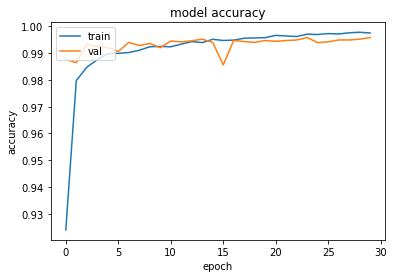

In [9]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')
plt.show()
#model.save('simple_sequential_model2')

In [3]:
tf.__version__

'2.3.1'